In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File Extraction from zip
path = '/content/drive/MyDrive/Files/brainmri'

#import zipfile
#with zipfile.ZipFile('/content/drive/MyDrive/Files/brainmri.zip', 'r') as zip_ref:
#    zip_ref.extractall('/content/drive/MyDrive/Files/brainmri')

In [ ]:
# installing Files
# !pip install umap

  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=ee0f135a99e6f9261b0d22b86b3a4e9f17b5094bbdac8364ebe9590f2b980d94
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [ ]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [ ]:
# Checking whether we are in correct Directory
os.listdir(path + '/brain_tumor_dataset')

['yes', 'no']


This is not a Tumor : 



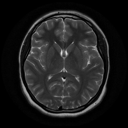

In [ ]:
# One Example of Not Tumor MRI
im_no = Image.open(path + '/brain_tumor_dataset/no/1 no.jpeg').resize((128, 128))
print("\nThis is not a Tumor : \n")
im_no


This is a Tumor : 



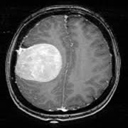

In [ ]:
# One Example of Tumor MRI
im_yes = Image.open(path + '/brain_tumor_dataset/yes/Y1.jpg').resize((128, 128))
print("\nThis is a Tumor : \n")
im_yes

In [ ]:
# Assigning Directories
yes = os.listdir(path + '/brain_tumor_dataset/yes')
no = os.listdir(path + '/brain_tumor_dataset/no')

In [ ]:
# Combining data for Both Directories in one and verifying
data = np.concatenate([yes, no])
print("Is Data Successfully merged ? : ", len(data) == len(yes) + len(no))

Is Data Successfully merged ? :  True


In [ ]:
print("\nThis is Data : \n")
data


This is Data : 



array(['Y195.JPG', 'Y28.jpg', 'Y19.JPG', 'Y192.JPG', 'Y65.JPG', 'Y27.jpg',
       'Y252.jpg', 'Y249.JPG', 'Y90.jpg', 'Y21.jpg', 'Y38.jpg',
       'Y157.JPG', 'Y245.jpg', 'Y77.jpg', 'Y3.jpg', 'Y105.jpg',
       'Y169.jpg', 'Y18.JPG', 'Y253.JPG', 'Y180.jpg', 'Y54.jpg',
       'Y243.JPG', 'Y120.JPG', 'Y193.JPG', 'Y166.JPG', 'Y6.jpg',
       'Y116.JPG', 'Y10.jpg', 'Y53.jpg', 'Y67.JPG', 'Y7.jpg', 'Y164.JPG',
       'Y75.JPG', 'Y107.jpg', 'Y44.JPG', 'Y183.jpg', 'Y60.jpg', 'Y26.jpg',
       'Y11.jpg', 'Y257.jpg', 'Y51.jpg', 'Y194.jpg', 'Y45.JPG', 'Y73.jpg',
       'Y31.jpg', 'Y147.JPG', 'Y254.jpg', 'Y86.JPG', 'Y167.JPG',
       'Y246.JPG', 'Y153.jpg', 'Y98.JPG', 'Y250.jpg', 'Y41.jpg',
       'Y258.JPG', 'Y113.JPG', 'Y76.jpg', 'Y186.jpg', 'Y50.JPG',
       'Y117.JPG', 'Y92.png', 'Y58.JPG', 'Y61.jpg', 'Y165.JPG', 'Y74.jpg',
       'Y34.jpg', 'Y96.jpg', 'Y111.JPG', 'Y70.jpg', 'Y168.jpg', 'Y12.jpg',
       'Y159.JPG', 'Y66.JPG', 'Y112.JPG', 'Y255.JPG', 'Y182.JPG',
       'Y85.JPG', 'Y89.JPG', 'Y6

In [ ]:
# Assigning Values for data as either 0 for No and 1 for Yes and Merging them
target_x = np.full(len(yes), 1)
target_y = np.full(len(no), 0)
data_target = np.concatenate([target_x, target_y])
print("Is Target Data Successfully merged after Assigning Values ? : ", len(data_target) == len(target_x) + len(target_y))

Is Target Data Successfully merged after Assigning Values ? :  True


In [ ]:
print("\nThis is Target Data : \n")
data_target


This is Target Data : 



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print("Does Data & Target Data have Equal Entries? : ", len(data_target) == len(data))

Does Data & Target Data have Equal Entries? :  True


In [ ]:
# Assigning Directories for Values
yes_values = os.listdir(path + '/brain_tumor_dataset/yes')
no_values = os.listdir(path + '/brain_tumor_dataset/no')

In [ ]:
X_data = []
for file in yes_values:
    #face = misc.imread(path + '/brain_tumor_dataset/yes/'+ file)
    img = cv2.imread(path + '/brain_tumor_dataset/yes/'+ file)
    face = cv2.resize(img, (32, 32))
    (b, g, r) = cv2.split(face) 
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [ ]:
#X_data = []
for file in no_values:
    #face = misc.imread(path + '/brain_tumor_dataset/no/'+ file)
    img = cv2.imread(path + '/brain_tumor_dataset/no/'+ file)
    face = cv2.resize(img, (32, 32))
    (b, g, r) = cv2.split(face) 
    img = cv2.merge([r, g, b])
    X_data.append(img)

In [ ]:
print("Does Data & Target Data & new X_Data Array have Equal Entries? : ", len(X_data) == len(data) == len(data_target))

Does Data & Target Data & new X_Data Array have Equal Entries? :  True


In [ ]:
# Assigning All data to X
X = np.squeeze(X_data)

# Dimentions of X
print('Dimentions of X : ', X.shape)

Dimentions of X :  (253, 32, 32, 3)


In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
# categorical_labels = to_categorical(data_target, num_classes=2)

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190], data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [ ]:
#CNN Model Training
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 9, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 9, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters = 36, kernel_size = 9, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [ ]:
# Compiling Model
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])

In [ ]:
model.fit(x_train, y_train, batch_size = 128, epochs = 150, validation_data = (x_valid, y_valid))

Epoch 1/150
2/2 [==============================] - 2s 651ms/step - loss: 0.6198 - acc: 0.5868 - val_loss: 2.7150 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 1s 385ms/step - loss: 0.7139 - acc: 0.8225 - val_loss: 0.9990 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 394ms/step - loss: 0.4747 - acc: 0.8277 - val_loss: 0.7934 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 391ms/step - loss: 0.5737 - acc: 0.8173 - val_loss: 0.7886 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 396ms/step - loss: 0.5769 - acc: 0.8095 - val_loss: 0.8499 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 398ms/step - loss: 0.5304 - acc: 0.8147 - val_loss: 1.0429 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 404ms/step - loss: 0.4635 - acc: 0.8173 - val_loss: 1.4826 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 3

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model,show_shapes = True).create(prog = 'dot', format = 'svg'))

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose = 0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6507936716079712


In [ ]:
# Labels
labels = ["Yes",  # index 0
        "No",      # index 1
        ]

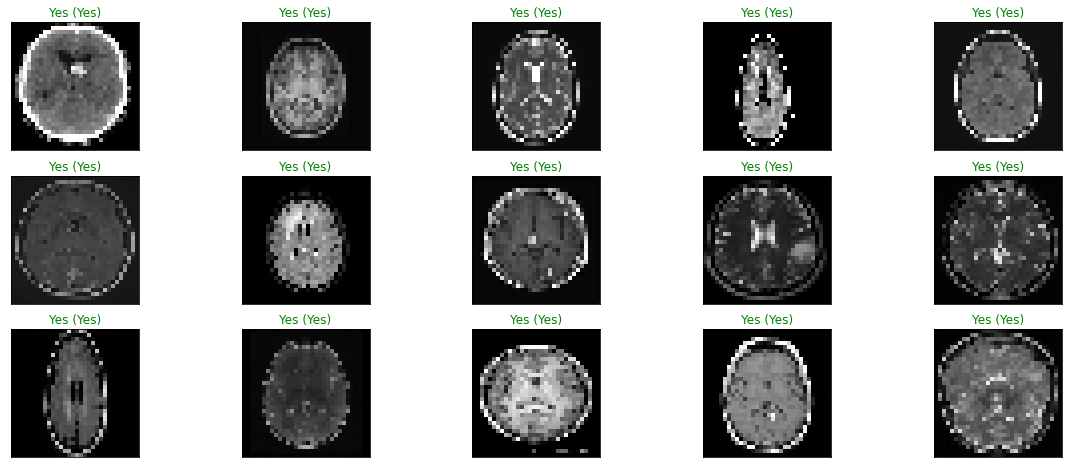

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize = (20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size = 15, replace = False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks = [], yticks = [])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], labels[true_index]), color = ("green" if predict_index ==  true_index else "red"))

plt.show()